## Project 4: Amplitude damping

In this project we will simulate the Jaynes-Cummings model, also known as the generalised amplitude damping model, and the Markovianity of the dynamics depending on the strength of the coupling. For more information on the model please refer to [Open Quantum Systems with Qiskit](https://matteoacrossi.github.io/oqs-jupyterbook/jaynes_cummings_with_losses.html).

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

To simulate the Jaynes-Cummings model, we consider one qubit as the system ($q_0$) and one extra qubit ($q_1$) to implement the dynamical map. In other words, we do not simulate the dynamics of system and environment, but only the resulting channel on the system qubit. Nevertheless, we will refer to $q_1$ as environment qubit. Given that the only parameter of the channel is $c_1(t)$ (which is itself parametrized by time), the following circuit results in such dynamics:

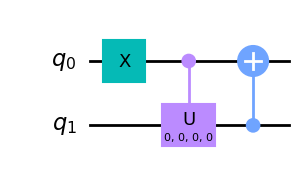

In [2]:
###########################################
#        Amplitude damping channel        #
###########################################

# Quantum register
q = QuantumRegister(2, name='q')

# Quantum circuit
ad = QuantumCircuit(q)

# Amplitude damping channel acting on system qubit
## Qubit identification
system = 0
environment = 1

# Define rotation angle
theta = 0.0

# Construct circuit
ad.x(q[system])
# Notice the extra factor 2 due to how qiskit defines the unitary angles
ad.cu(theta, 0.0, 0.0, 0.0, q[system], q[environment])
ad.cx(q[environment], q[system])

# Draw circuit
ad.draw(output='mpl')

Recall that, in the above circuit, $\theta = \arccos{c_1(t)}$ with
\begin{equation}
c_{1}(t)=e^{-\lambda t/2}\left[\cosh\left(\frac{\lambda t}{2}\sqrt{1-2R}\right)+\frac{1}{\sqrt{1-2R}}\sinh\left(\frac{\lambda t}{2}\sqrt{1-2R}\right)\right].
\end{equation}

### Task 1 (1p)

Write a function that returns $c_1(t)$. The function should admit an extra parameter $R$ and return the correct value for $R > 1/2$ and $R < 1/2$.

Here is the suggested structure:

In [3]:
def c1(R,t):
    """Returns the coherence factor in the amplitude damping channel
    
    Args:
        R (float): value of R = \gamma_0/\lambda
        t (float): value of the time variable
    
    Returns:
        A float number
    """

### Task 2 (1p)

Write a function that returns the amplitude damping channel given the values of $R$ and $t$. You can choose to include the initial state of the system ($|1\rangle$) into the function or to initialize its state elsewhere later.

The suggested structure is

In [4]:
def amplitude_damping_channel(q, c, sys, env, R, t):
    """Returns a QuantumCircuit implementing the amplitude damping channel on the system qubit
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system qubit
        sys (int): index for the system qubit
        env (int): index for the environment qubit
        R (float): value of R = \gamma_0/\lambda
        t (float): value of the time variable
    
    Returns:
        A QuantumCircuit object
    """

### Task 3 (3p)

Choose some (at least 2) values of $R$. There should be values above and below $1/2$. For each value, simulate the amplitude damping channel at several values of $t$ and measure the probability for the atom to be in the excited state ($|1\rangle$) on a noiseless as well as a noisy simulator (e.g. FakePerth) with readout error mitigation ([LocalReadoutError](https://qiskit.org/ecosystem/experiments/stubs/qiskit_experiments.library.characterization.LocalReadoutError.html)). Plot the results.

### Task 4 (1p)

We now turn our attention towards the Markovianity of the dynamics. To that end, we will simulate the channel introducing the non-Markovianity witness (you can find the circuit below). 

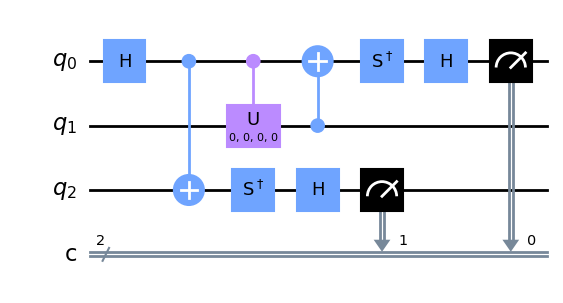

In [5]:
#######################################
#      Amplitude damping channel      #
#         with non-M. witness         #
#######################################

# Quantum and classical register
q = QuantumRegister(3, name='q')
c = ClassicalRegister(2, name='c')

# Quantum circuit
ad = QuantumCircuit(q, c)

# Amplitude damping channel acting on system qubit
# with non-Markovianity witness
## Qubit identification
system = 0
environment = 1
ancilla = 2

# Define rotation angle
theta = 0.0

# Construct circuit
## Bell state between system and ancilla
ad.h(q[system])
ad.cx(q[system], q[ancilla])

## Channel acting on system qubit
ad.cu(theta, 0.0, 0.0, 0.0, q[system], q[environment])
ad.cx(q[environment], q[system])

## Local measurement for the witness
### Choose observable
observable = 'YY'
### Change to the corresponding basis
if observable == 'XX':
    ad.h(q[system])
    ad.h(q[ancilla])
elif observable == 'YY':
    ad.sdg(q[system])
    ad.h(q[system])
    ad.sdg(q[ancilla])
    ad.h(q[ancilla])
### Measure
ad.measure(q[system], c[0])
ad.measure(q[ancilla], c[1])

# Draw circuit
ad.draw(output='mpl')

The witness is given by the probability of measuring the system and the ancilla in state $| \phi^{+} \rangle \langle \phi^{+} | = (\mathbb{I}\otimes \mathbb{I} + \sigma_{x}\otimes \sigma_{x} - \sigma_{y}\otimes \sigma_{y} + \sigma_{z}\otimes \sigma_{z})/4$, and the above circuit allows for the measurement of the corresponding observables.

Write a function returning, for a given witness observable, $R$ and $t$, the corresponding circuit.

Suggested structure below.

In [ ]:
def amplitude_damping_channel_witness(q, c, sys, env, anc, observable, R, t):
    """Returns a QuantumCircuit implementing the amplitude damping channel on the system qubit with non-Markovianity witness
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system and ancilla qubits
        sys (int): index for the system qubit
        env (int): index for the environment qubit
        anc (int): index for the ancillary qubit
        observable (str): the observable to be measured. Possible values "XX", "YY", "ZZ"
        R (float): value of R = \gamma_0/\lambda
        t (float): value of the time variable
    
    Returns:
        A QuantumCircuit object
    """

### Task 5 (4p)

Simulate the dynamics with the witness for the same values of $R$ and $t$ as in Task 3. To do so, run the circuits on a noiseless as well as a noisy simulator (e.g. FakePerth) with readout error mitigation for the three observables, $\sigma_{x}\otimes \sigma_{x}$, $\sigma_{y}\otimes \sigma_{y}$, and $\sigma_{z}\otimes \sigma_{z}$ and compute their expected values. This allows to compute the value of the witness as $1 + \left\langle \sigma_{x}\otimes \sigma_{x} \right\rangle - \left\langle\sigma_{y}\otimes \sigma_{y} \right\rangle + \left\langle\sigma_{z}\otimes \sigma_{z} \right\rangle)/4$. Plot the results as a function of $t$.

### Homework

Run the circuits on the IBM Quantum with readout error mitigation and plot the results.